### Project Overview   
In this project, I take a closer look at the prices of apartments for rent in the capital of Poland. This analysis may be useful for someone who is planning to move to Warsaw or change their apartment. In this project, I want to get a general idea of prices in Warsaw and their dependence on various factors such as the size of the apartment or location.

### Data Source  
Thank you Krzysztof Jamroz for providing a qualitative set of data on apartments for rent and for sale in Poland.  
In this project, I focus only on a section of the data relating to Warsaw. The entire dataset can be found at the following link:  
https://www.kaggle.com/datasets/krzysztofjamroz/apartment-prices-in-poland/data

### Data Fields
- city - the name of the city where the property is located  
- type - type of the building  
- squareMeters - the size of the apartment in square meters  
- rooms - number of rooms in the apartment  
- floor / floorCount - the floor where the apartment is located and the total number of floors in the building  
- buildYear - the year when the building was built  
- latitude, longitude - geo coordinate of the property  
- centreDistance - distance from the city centre in km  
- poiCount - number of points of interest in 500m range from the apartment (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)  
- [poiName]Distance - distance to the nearest point of interest (schools, clinics, post offices, kindergartens, restaurants, colleges, pharmacies)  
- ownership - the type of property ownership  
- condition - the condition of the apartment  
- has[features] - whether the property has key features such as assigned parking space, balcony, elevator, security, storage room  
- price - offer price in Polish Zloty (sale offers: sale price, rent offers: monthly rent)


### Import libraries and data

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [37]:
#apartment rental data
rent11 = pd.read_csv('apartments_rent_pl_2023_11.csv')
rent11 = rent11.assign(date='November 2023')

rent12 = pd.read_csv('apartments_rent_pl_2023_12.csv')
rent12 = rent12.assign(date='December 2023')

df = pd.concat([rent11, rent12])

#I am only interested in Warsaw data
df = df[df['city'] == 'warszawa'].copy()
df.drop(columns=['id', 'city'], inplace=True)

df.head()

,type,squareMeters,rooms,floor,floorCount,buildYear,latitude,longitude,centreDistance,poiCount,...,ownership,buildingMaterial,condition,hasParkingSpace,hasBalcony,hasElevator,hasSecurity,hasStorageRoom,price,date
4660,apartmentBuilding,47.0,2.0,8.0,9.0,2020.0,52.257912,20.968610,3.76,33.0,...,condominium,brick,premium,yes,yes,yes,no,no,5000,November 2023
4661,NaN,27.0,1.0,3.0,7.0,2020.0,52.249800,21.035200,2.95,33.0,...,condominium,NaN,NaN,yes,yes,yes,no,no,2950,November 2023
4662,apartmentBuilding,51.0,2.0,5.0,7.0,2010.0,52.222864,21.009959,1.08,85.0,...,condominium,brick,NaN,no,yes,yes,no,no,3700,November 2023
4663,tenement,50.0,3.0,3.0,5.0,1913.0,52.224948,21.012136,0.95,124.0,...,condominium,brick,NaN,no,no,yes,no,no,5000,November 2023
4664,tenement,39.8,2.0,2.0,3.0,1939.0,52.216513,21.041474,3.09,6.0,...,condominium,brick,NaN,no,no,no,no,no,4500,November 2023


### Data Cleaning

In [38]:
# let's check the data type and whether there are empty values
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7244 entries, 4660 to 8676
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  4964 non-null   object 
 1   squareMeters          7244 non-null   float64
 2   rooms                 7244 non-null   float64
 3   floor                 6509 non-null   float64
 4   floorCount            7138 non-null   float64
 5   buildYear             5252 non-null   float64
 6   latitude              7244 non-null   float64
 7   longitude             7244 non-null   float64
 8   centreDistance        7244 non-null   float64
 9   poiCount              7244 non-null   float64
 10  schoolDistance        7244 non-null   float64
 11  clinicDistance        7243 non-null   float64
 12  postOfficeDistance    7244 non-null   float64
 13  kindergartenDistance  7234 non-null   float64
 14  restaurantDistance    7218 non-null   float64
 15  collegeDistance   

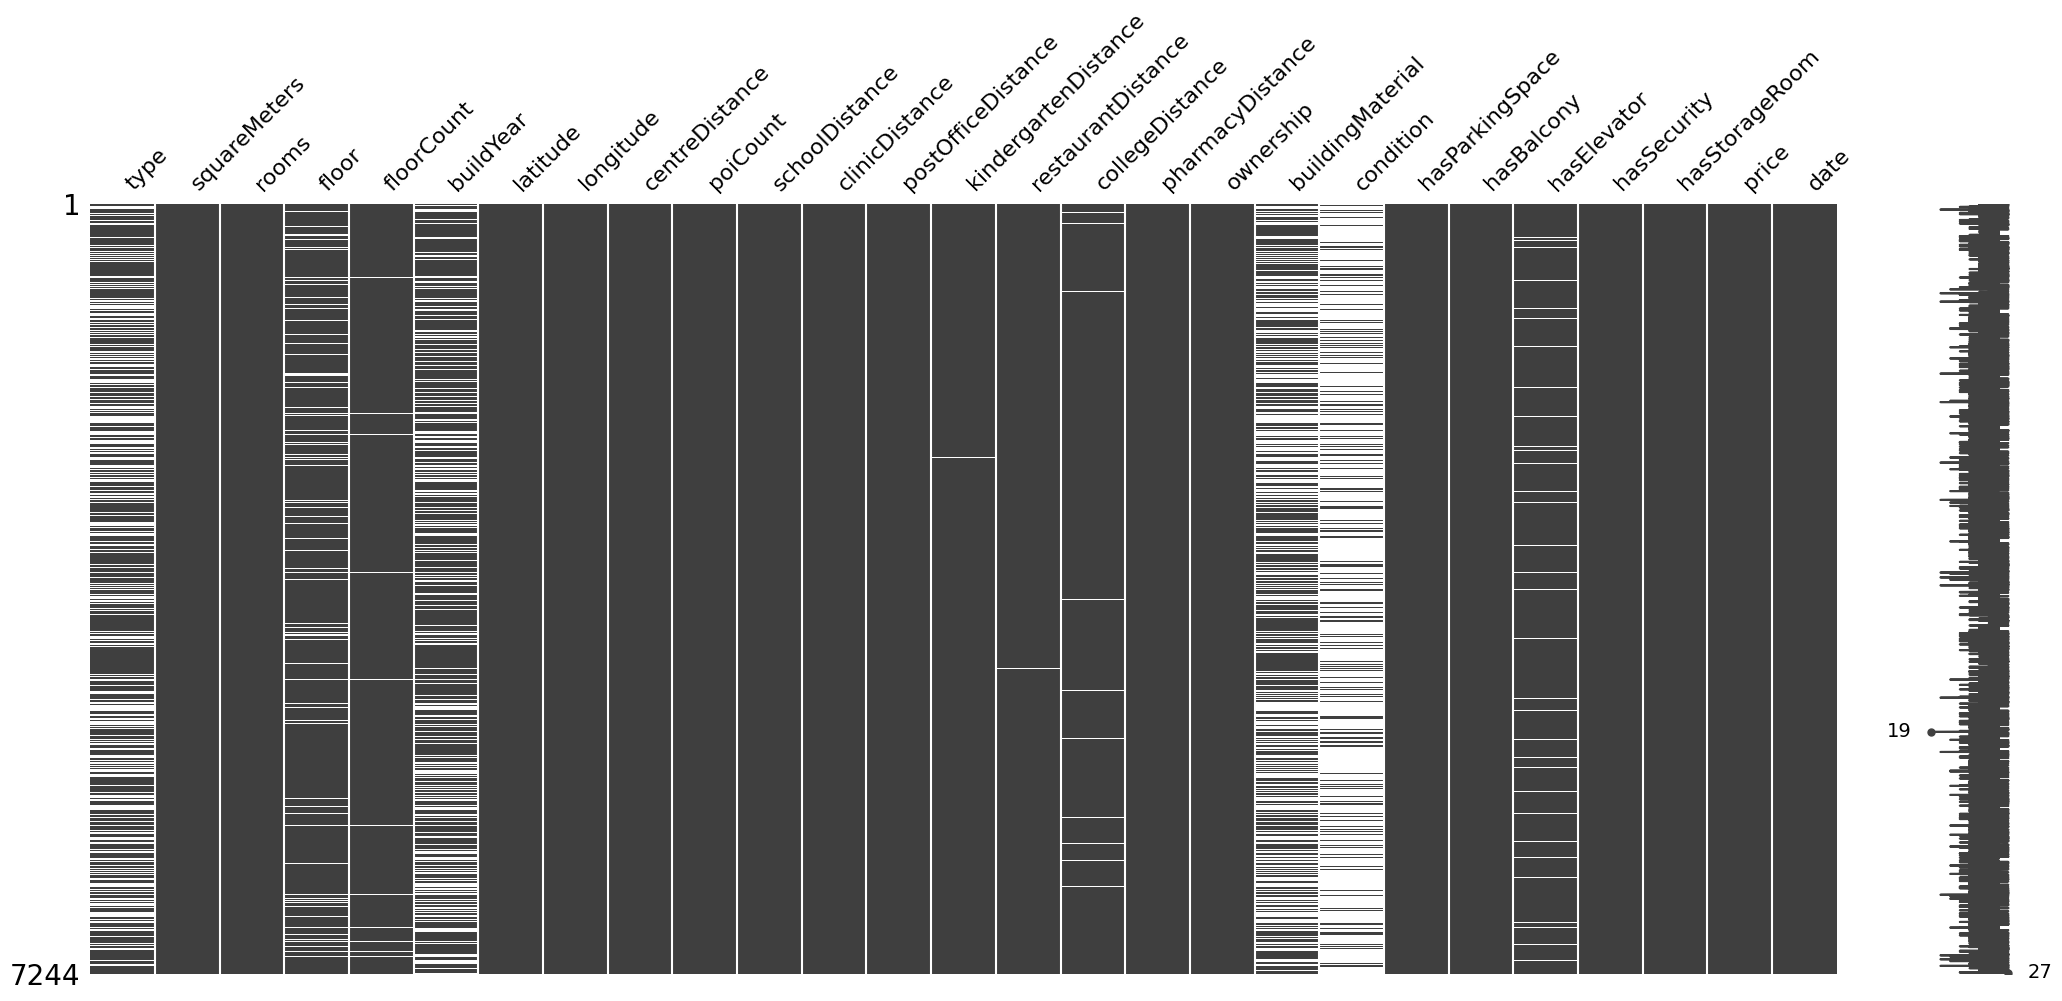

In [39]:
# let's check where and how much data is missing
import missingno as msno

msno.matrix(df)
plt.show()

<Axes: >

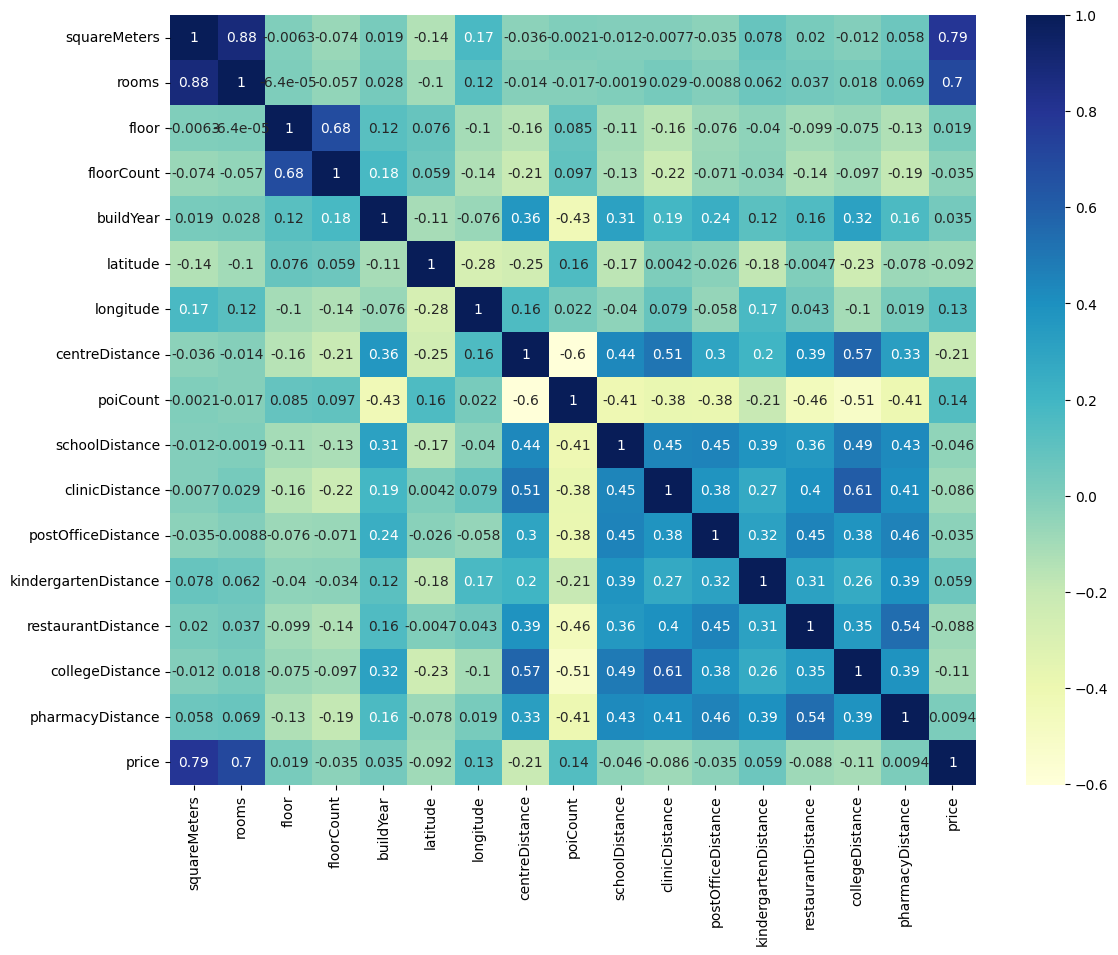

In [40]:
plt.figure(figsize=(13,10))
sns.heatmap(df.corr(numeric_only = True), cmap='YlGnBu', annot=True)


In [41]:
print(df['ownership'].nunique())

1


In [42]:
# Several columns have a lot of missing values.
# at the same time, these values do not have such an impact on the price. Let's just remove them
# I also remove ownership since it only takes one value

rare_columns = ['type', 'floor', 'floorCount', 'buildYear', 'buildingMaterial','condition','hasElevator',
                'schoolDistance', 'clinicDistance','kindergartenDistance','restaurantDistance','collegeDistance',
                'pharmacyDistance','postOfficeDistance','ownership']
df.drop(columns=rare_columns, inplace=True)

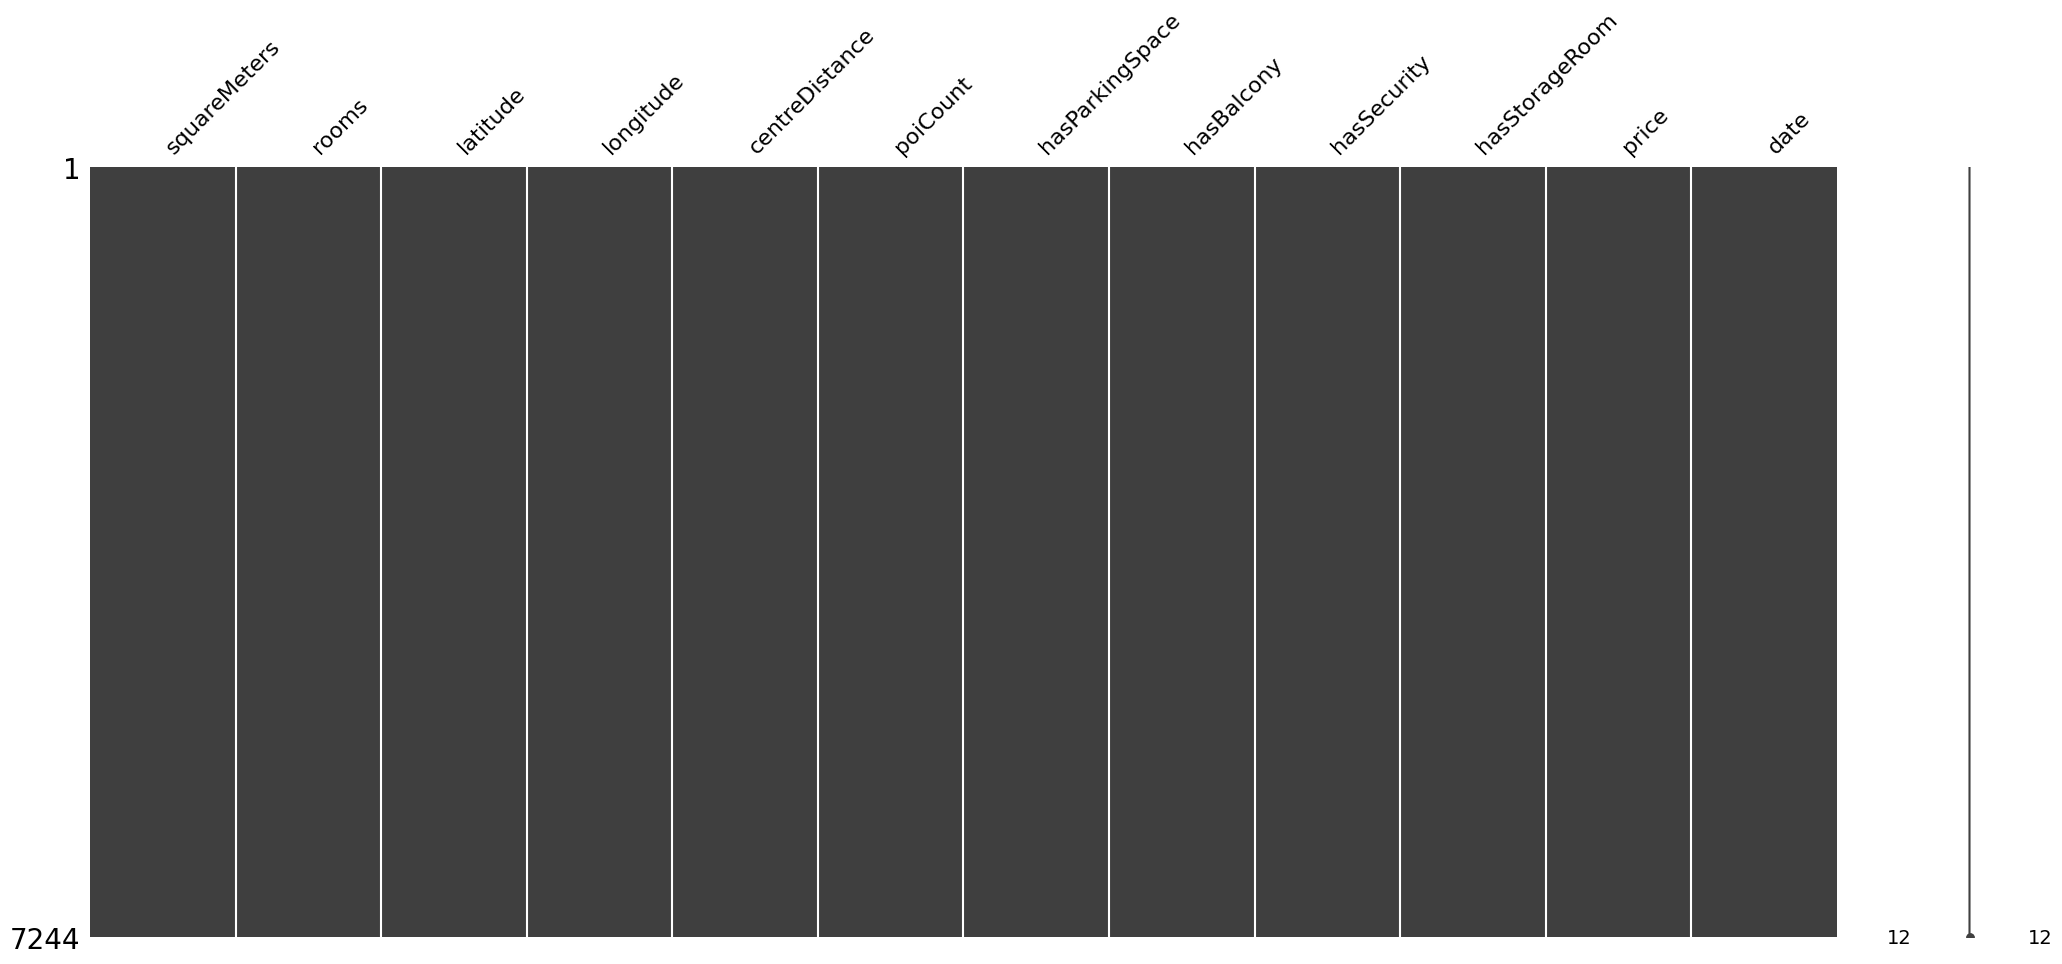

In [43]:
msno.matrix(df)
plt.show()

In [44]:
df.head()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasSecurity,hasStorageRoom,price,date
4660,47.0,2.0,52.257912,20.968610,3.76,33.0,yes,yes,no,no,5000,November 2023
4661,27.0,1.0,52.249800,21.035200,2.95,33.0,yes,yes,no,no,2950,November 2023
4662,51.0,2.0,52.222864,21.009959,1.08,85.0,no,yes,no,no,3700,November 2023
4663,50.0,3.0,52.224948,21.012136,0.95,124.0,no,no,no,no,5000,November 2023
4664,39.8,2.0,52.216513,21.041474,3.09,6.0,no,no,no,no,4500,November 2023


In [56]:
#converting categorical columns to binary
columns_to_change = ['hasParkingSpace', 'hasBalcony', 'hasSecurity','hasStorageRoom']
maping = {'yes': 1, 'no': 0}

df[columns_to_change] = df[columns_to_change].applymap(lambda x: maping.get(x, x))


In [55]:
df.head()

,squareMeters,rooms,latitude,longitude,centreDistance,poiCount,hasParkingSpace,hasBalcony,hasSecurity,hasStorageRoom,price,date
4660,47.0,2.0,52.257912,20.968610,3.76,33.0,1,1,0,0,5000,November 2023
4661,27.0,1.0,52.249800,21.035200,2.95,33.0,1,1,0,0,2950,November 2023
4662,51.0,2.0,52.222864,21.009959,1.08,85.0,0,1,0,0,3700,November 2023
4663,50.0,3.0,52.224948,21.012136,0.95,124.0,0,0,0,0,5000,November 2023
4664,39.8,2.0,52.216513,21.041474,3.09,6.0,0,0,0,0,4500,November 2023


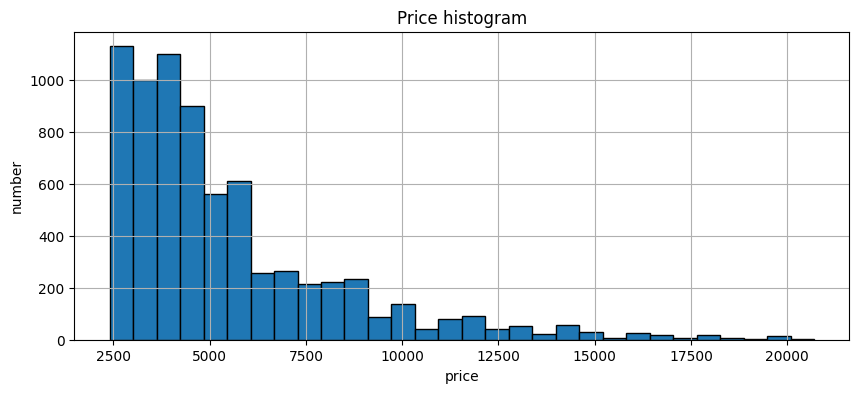

In [47]:
# let's take a closer look at the price
df['price'].hist(figsize=(10,4), bins=30, edgecolor='black') 
plt.title(f'Price histogram')
plt.xlabel('price')
plt.ylabel('number')
plt.show()

In [48]:
# Rather few people are interested in apartments for rent for PLN 20,000 per month.
# Let's limit the data to apartments that fall within the limit of two upper standard deviations.

mean_price = df['price'].mean()
std_dev_price = df['price'].std()
upper_bound = mean_price + 2 * std_dev_price

print(f'Mean Price: {mean_price:.2f}')
print(f'Standard Deviation: {std_dev_price:.2f}')
print(f'Upper Bound (2 Standard Deviations): {upper_bound:.2f}')
df_filter_prices = df[(df['price'] >= mean_price - 2 * std_dev_price) & (df['price'] <= mean_price + 2 * std_dev_price)]


Mean Price: 5447.02
Standard Deviation: 2937.53
Upper Bound (2 Standard Deviations): 11322.07


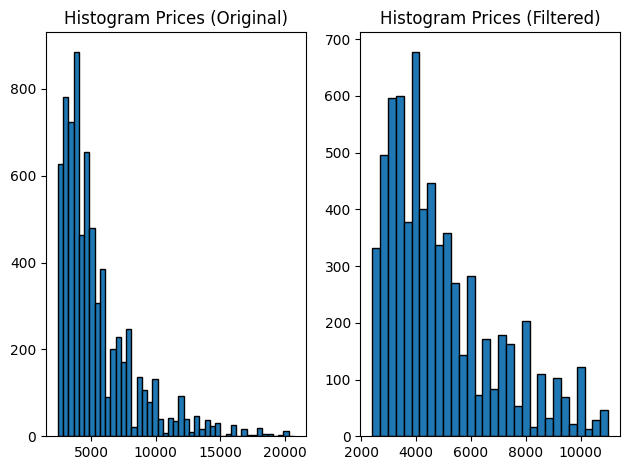

In [49]:

plt.subplot(1, 2, 1)
plt.hist(df['price'], bins=45, edgecolor='black')
plt.title('Histogram Prices (Original)')

plt.subplot(1, 2, 2)
plt.hist(df_filter_prices['price'], bins=30, edgecolor='black')
plt.title('Histogram Prices (Filtered)')

plt.tight_layout()
plt.show()


### EDA

In [50]:
df.columns

Index(['squareMeters', 'rooms', 'latitude', 'longitude', 'centreDistance',
       'poiCount', 'hasParkingSpace', 'hasBalcony', 'hasSecurity',
       'hasStorageRoom', 'price', 'date'],
      dtype='object')

array([[<Axes: title={'center': 'squareMeters'}>,
        <Axes: title={'center': 'rooms'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'centreDistance'}>,
        <Axes: title={'center': 'poiCount'}>],
       [<Axes: title={'center': 'hasParkingSpace'}>,
        <Axes: title={'center': 'hasBalcony'}>,
        <Axes: title={'center': 'hasSecurity'}>],
       [<Axes: title={'center': 'hasStorageRoom'}>,
        <Axes: title={'center': 'price'}>, <Axes: >]], dtype=object)

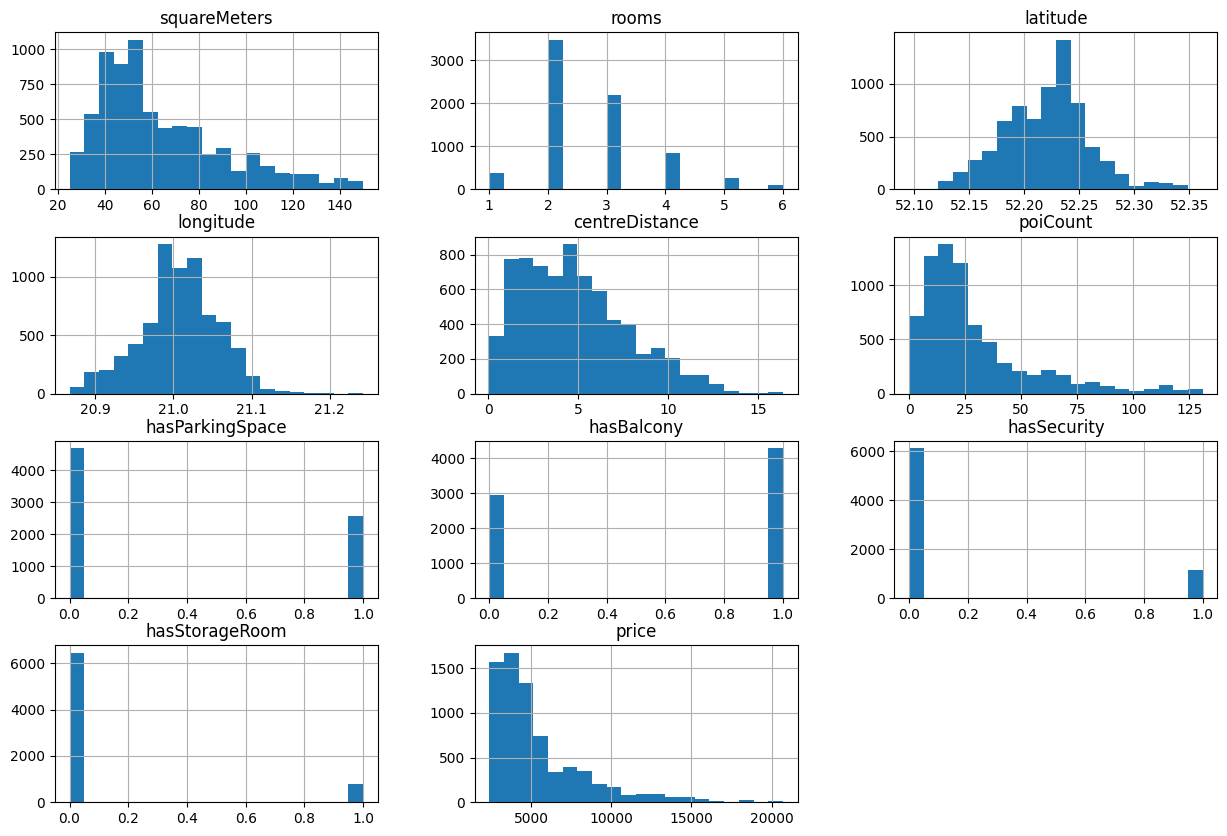

In [57]:
df.hist(figsize=(15,10), bins = 20)

**Notes:**
- most apartments have an area of approximately 50 square meters
- the most popular are apartments with two rooms
- the further from the center of Warsaw, the fewer apartments - but there is a certain increase at a distance of about 4-5 km
- the price of most apartments is below PLN 5,000 (it is worth remembering that the data does not include rent)

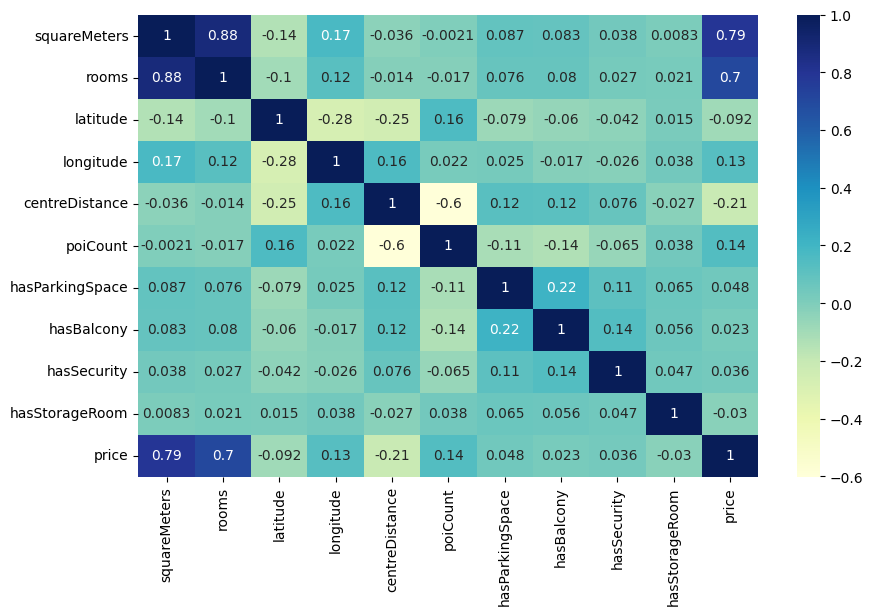

In [62]:
#correlation between different factors
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only = True), cmap='YlGnBu', annot=True)
plt.show()

**Note:**  
The size of the apartment and the number of rooms are most correlated with the price of the apartment

<Axes: xlabel='longitude', ylabel='latitude'>

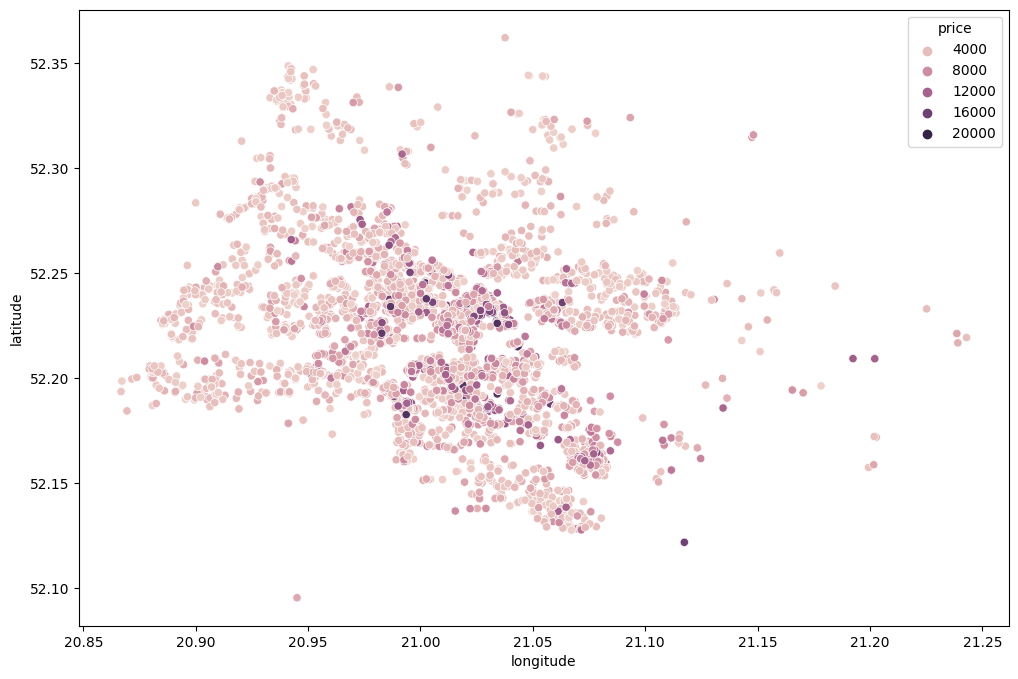

In [53]:
#I would like to see what apartment prices look like depending on latitude and longitude
plt.figure(figsize=(12,8))
sns.scatterplot(x='longitude',y='latitude',data=df,hue='price')

**Note:**  
It looks like apartments in the center of Warsaw and along the metro lines tend to be more expensive. Let's add a map to make it easier to see

In [54]:
# adding an interactive map
import folium as folium

m = folium.Map(location=[52.237, 21.017], zoom_start=12)


# Adding points to the map
for index, row in df.iterrows():
    color = sns.color_palette("flare", as_cmap=True)(row['price'] / df['price'].max())
    hex_color = "#{:02x}{:02x}{:02x}".format(int(color[0]*255), int(color[1]*255), int(color[2]*255))

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,
        popup=f"Price: {row['price']}, Size: {row['squareMeters']}, Rooms: {row['rooms']}",
        color=hex_color,
        fill=True,
        fill_color=hex_color,
        fill_opacity=0.7,
    ).add_to(m)

m


KeyboardInterrupt: 

**Note:**  
If you are interested in a certain district of Warsaw, you can zoom in on the map ;)

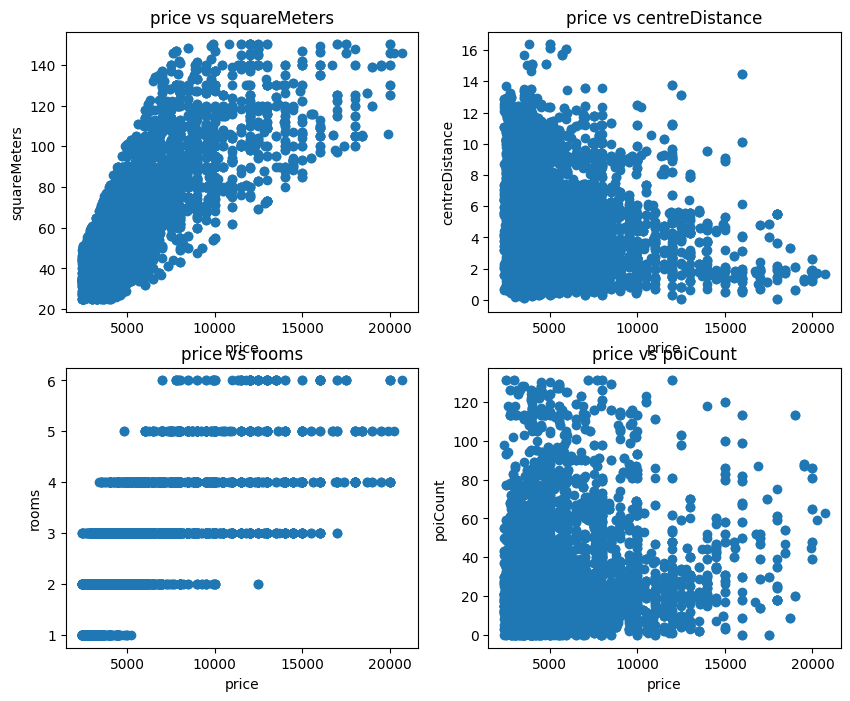

In [ ]:
#What is the relationship between the price of certain factors?

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.scatter(df['price'], df['squareMeters'])
plt.xlabel('price')
plt.ylabel('squareMeters')
plt.title('price vs squareMeters')

plt.subplot(2, 2, 2)
plt.scatter(df['price'], df['centreDistance'])
plt.xlabel('price')
plt.ylabel('centreDistance')
plt.title('price vs centreDistance')

plt.subplot(2, 2, 3)
plt.scatter(df['price'], df['rooms'])
plt.xlabel('price')
plt.ylabel('rooms')
plt.title('price vs rooms')

plt.subplot(2, 2, 4)
plt.scatter(df['price'], df['poiCount'])
plt.xlabel('price')
plt.ylabel('poiCount')
plt.title('price vs poiCount')

plt.show()


**Notes:**  
- The larger the area, the higher the price. The relationship is almost linear.
- It turns out that if you want to live in the center, you can find cheap apartments there (not taking into account the standard or size of the apartment yet). At the same time, most expensive apartments are not very far from the center.
- The price slowly increases with the number of rooms. One-room apartments range up to approximately PLN 5,000 (without rent). But you can also find a 2 or 3-room apartment at the lowest price. The most expensive apartments (over PLN 10,000) actually always have more than 2 rooms.
- If you want your apartment to have a lot of PoiCount (interesting places within 500 m from the apartment), you don't need an expensive apartment (again - not taking into account the standard or size of the apartment yet)

C:\Users\julia\AppData\Local\Temp\ipykernel_9968\411856281.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_prices['price_per_square_meter'] = df_filter_prices['price'] / df_filter_prices['squareMeters']


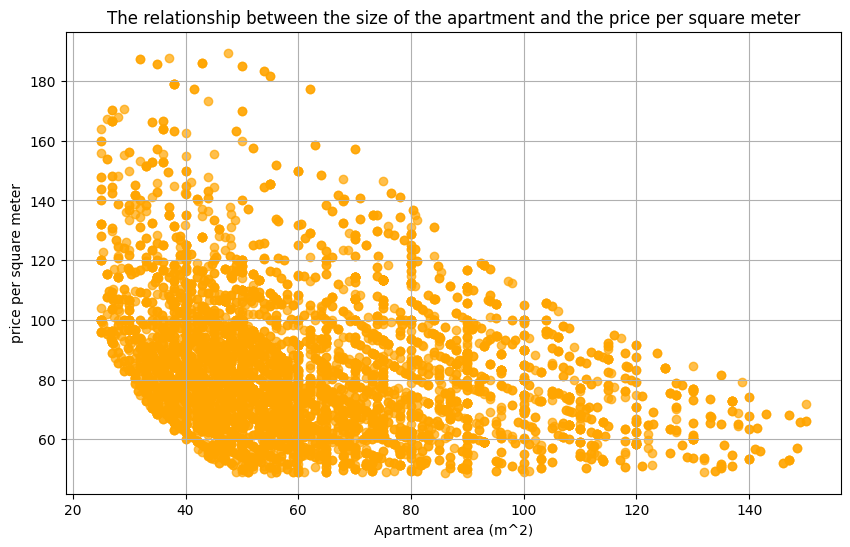

In [ ]:
# what is the relationship between the price per square meter and the size of the apartment?
df_filter_prices['price_per_square_meter'] = df_filter_prices['price'] / df_filter_prices['squareMeters']

plt.figure(figsize=(10, 6))
plt.scatter(df_filter_prices['squareMeters'], df_filter_prices['price_per_square_meter'], color='orange', alpha=0.7)
plt.title('The relationship between the size of the apartment and the price per square meter')
plt.xlabel('Apartment area (m^2)')
plt.ylabel('price per square meter')
plt.grid(True)
plt.show()


**Note** 
In smaller apartments (up to about 50 square meters) we will pay more per square meter. Then the price stops falling so significantly.

In [ ]:
import plotly.express as px

# Create an interactive 3D scatter plot
fig = px.scatter_3d(df_filter_prices, x='centreDistance', y='squareMeters', z='price',
                    color='price', opacity=1, size_max=4)

fig.update_layout(scene=dict(xaxis_title='Distance from center',
                             yaxis_title='Apartment Size (m^2)',
                             zaxis_title='Price'))

fig.update_layout(title='Relationship between Distance from Center, Apartment Size, and Price')

fig.show()


C:\Users\julia\AppData\Local\Temp\ipykernel_9968\1000748265.py:12: MatplotlibDeprecationWarning:

The draw_all function was deprecated in Matplotlib 3.6 and will be removed two minor releases later. Use fig.draw_without_rendering() instead.



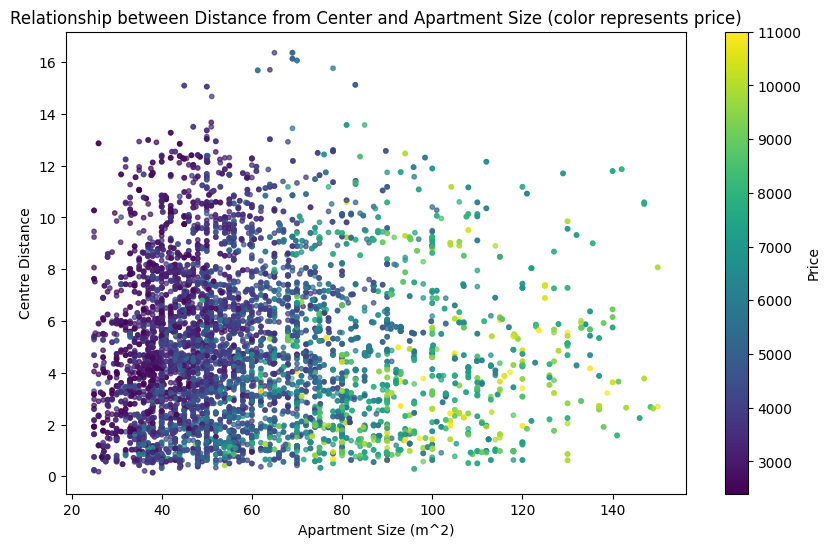

In [ ]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_filter_prices['squareMeters'], df_filter_prices['centreDistance'], c=df_filter_prices['price'],
                      cmap='viridis', s=10, alpha=0.7)

plt.xlabel('Apartment Size (m^2)')
plt.ylabel('Centre Distance')

plt.title('Relationship between Distance from Center and Apartment Size (color represents price)')

cbar = plt.colorbar(scatter, label='Price')
cbar.set_alpha(1)
cbar.draw_all()

plt.show()


In [ ]:
df.to_csv('Warsaw_rent_cleaned.csv', index=False)